<img src="https://pages.cnpem.br/workshopbioimagens/wp-content/uploads/sites/166/2023/06/logo-ilum-2048x382.png" alt="Descrição da imagem" style="width: 1000px; height: auto; ">
 
<div style=" padding: 10px; font-size: 15px; text-align: center;">
<strong> 👹 Fera Formidável 4.11 👹 </strong> 
</div>
 
<div style=" padding: 10px; font-size: 25px; text-align: center;">
<strong> Eles estão se multiplicando! </strong> 
</div>
<div class="alert alert-warning">
<div style="text-align: center; font-size: 15px"><b>Objetivo:</b>  Encontrar a menor distância para o problema do caixeiro viajante que prefere cidades ímpares. </div>
</div>
 
<div style=" padding: 10px; font-size: 15px; text-align: center;">
<strong>Vitor Gabriel Dreveck</strong></div>
<div style=" padding: 1px; font-size: 15px; text-align: center;">
<strong>Yasmin Barbosa Shimizu</strong></div>
<div style=" padding: 10px; font-size: 15px; text-align: center;">
Prof. Dr. Daniel R. Cassar</div>

---

### Introdução

<div style=" padding: 10px; text-align: justify">
Este notebook tem fins didáticos e foi desenvolvido durante as aulas de Redes Neurais e Algoritmos Genéticos no terceiro semestre da Ilum Escola de Ciência.</div>

<div style=" padding: 10px; text-align: justify">
Nosso objetivo é encontrar o caminho de menor distância no problema do caixeiro viajante, com a peculiaridade de existir mais de um caixeiro. </div>

<div style=" padding: 10px; text-align: justify">
Considerações do experimento: Consideraremos um número $n ≥ 10$ de coordenadas $(x, y)$ de cidades (cada cidade ocupa uma posição $(x, y)$ diferente). Os caixeiros só andam em linha reta e apenas entre duas cidades. Todos os caixeiros começam em cidades diferentes e jamais visitam cidades já visitadas por outros caixeiros. </div>

### Resolução

<div style="padding: 10px; text-align: justify">
Todas as funções desenvolvidas neste notebook, bem como as em que nos baseamos para fazê-las, estão no <i>script</i> <code>funcoes_fera_11.py</code> (vide o <a href="https://github.com/yasminbshimizu/Caixeiros_Viajantes_Diversos_AG" target="_blank">repositório GitHub</a>).
</div>


<div style=" padding: 10px; text-align: justify">
Antes de começar a resolver, temos que montar o problema. Primeiro, vamos criar um dicionário cujas chaves indicam o número da cidade e cujos valores são tuplas indicando a localização $(x, y)$ da cidade no plano $x\times y$.</div>

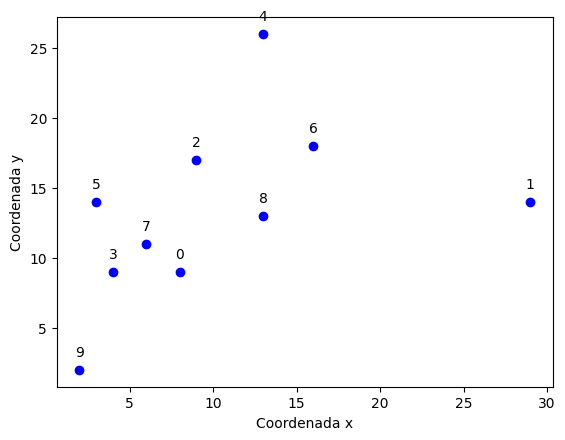

In [1]:
from funcoes_fera_11 import plota_cidades

CIDADES = {
    0: (8, 9),
    1: (29, 14),
    2: (9, 17),
    3: (4, 9),
    4: (13, 26),
    5: (3, 14),
    6: (16, 18),
    7: (6, 11),
    8: (13, 13),
    9: (2, 2),
}

plota_cidades(CIDADES)

Vamos definir a forma de uma possível solução do problema. Para isso, usaremos uma lista de listas, as últimas (isto é, as listas internas) representando o trajeto de um caixeiro. Dessa forma, existe uma lista para cada caixeiro, e um indivíduo é uma lista com a rota de cada caixeiro. Podemos gerar uma rota exemplo para visualizar uma possível resolução do problema. Cada cor representa a rota de um caixeiro diferente.

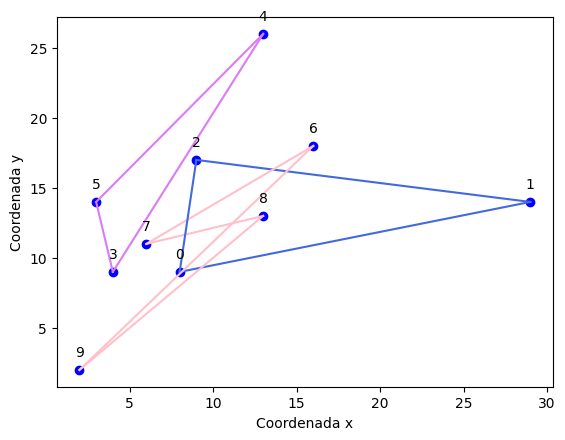

In [2]:
from funcoes_fera_11 import plota_multiplos_trajetos

candidatos = [[0, 1, 2], [3, 4, 5], [6, 7, 8, 9]]

plota_multiplos_trajetos(CIDADES, candidatos)

<div style=" padding: 10px; text-align: justify">
Agora sim podemos começar a trabalhar. Esse problema se assemelha muito ao problema do caixeiro viajante comum, já resolvido em aula. Por isso, podemos nos basear nele e apenas implementar algumas modificações. Assim, podemos reutilizar as funções: <code>cria_cidades</code> e <code>selecao_torneio_min</code>. As outras funções precisam ser modificadas ou trocadas.</div>

<div style=" padding: 10px; text-align: justify">
Vamos, então, às funções que precisamos criar. A primeira será <code>sorteia_num_cidades</code>, que usaremos na próxima função. Sorteia um número de cidades para um dos caixeiros, ou seja, quantas cidades aquele caixeiro irá visitar.</div> 

<div style=" padding: 10px; text-align: justify">
Em seguida, criamos <code>calc_n_cidades_multiplos_cx</code>, que usará a função anterior em um loop para definirmos quantas cidades cada caixeiro irá visitar. Ela faz isso de forma a ter certeza de que a soma seja o total de cidades e que todos os caixeiros visitem pelo menos uma cidade. </div>

<div style=" padding: 10px; text-align: justify">
A próxima função é <code>cria_candidato_multiplos_cx</code>, que, como o nome sugere, cria um candidato para solução do problema. Ela usa a função anterior para sortear um número de cidades para cada caixeiro e sorteia as cidades em si, garantindo que nenhum caixeiro vai visitar a mesma cidade mais de uma vez e nenhuma cidade será visitada por mais de um caixeiro. Essa função é usada em loop para criar uma população na função <code>populacao_multiplos_cx</code>.</div>

In [3]:
import random

def sorteia_num_cidades(valor_max):
    """Sorteia um número de cidades para um dos caixeiros no problema do caixeiro viajante 
    com múltiplos caixeiros"""
    valores_possiveis = range(1, valor_max + 1)
    gene = random.choice(valores_possiveis)
    return gene


def calc_n_cidades_multiplos_cx(cidades, n_caixeiros):
    """Sorteia quantas cidades cada caixeiro irá percorrer.

    Args:
      cidades: dicionario contendo as cidades e suas respectivas coordenadas.
      n_caixeiros: número de caixeiros. 
    """
    cidade_por_caixeiro = []

    n_cidades = len(cidades)
    aux_max = n_cidades - n_caixeiros + 1

    for i in range(n_caixeiros):
        if i == n_caixeiros - 1:
            cidade_por_caixeiro.append(n_cidades - sum(cidade_por_caixeiro))
            break

        gene = sorteia_num_cidades(aux_max)
        cidade_por_caixeiro.append(gene)

        aux_max -= (gene + 1)
        if aux_max < 1:
            aux_max = 1

    return cidade_por_caixeiro


def cria_candidato_multiplos_cx(cidades, n_caixeiros):
    """Cria um candidato aleatório para o problema do caixeiro viajante com múltiplos caixeiros.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    
    cidades_por_caixeiro = calc_n_cidades_multiplos_cx(cidades, n_caixeiros)

    candidato = []
    cidades_disponiveis = list(cidades.keys()).copy()

    for ccx in cidades_por_caixeiro:
        caminho = random.sample(cidades_disponiveis, k=ccx)
        candidato.append(caminho)
        for cidade in caminho:
            cidades_disponiveis.remove(cidade)

    return candidato


def populacao_multiplos_cx(tamanho_populacao, cidades, n_caixeiros):
    """Cria uma população no problema do caixeiro viajante que prefere cidades ímpares.

    Args:
      tamanho_populacao: tamanho da população.
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    populacao = []

    for _ in range(tamanho_populacao):
        populacao.append(cria_candidato_multiplos_cx(cidades, n_caixeiros))

    return populacao

populacao = populacao_multiplos_cx(10, CIDADES, 4)

print('População: ')
print()
for i, individuo in enumerate(populacao):
    print(f"Indivíduo {i}: {individuo}")

População: 

Indivíduo 0: [[6, 0, 2], [4, 5], [9], [8, 3, 7, 1]]
Indivíduo 1: [[2, 7, 6], [0], [1], [8, 5, 3, 9, 4]]
Indivíduo 2: [[6, 5, 9, 8], [2, 4], [7], [1, 0, 3]]
Indivíduo 3: [[2, 9, 3, 5], [0, 4], [8], [7, 1, 6]]
Indivíduo 4: [[7], [2, 3, 8], [4], [0, 1, 6, 9, 5]]
Indivíduo 5: [[7, 4, 8, 2, 3, 6], [1], [9], [5, 0]]
Indivíduo 6: [[1, 0], [2, 4], [3], [7, 5, 6, 8, 9]]
Indivíduo 7: [[6, 4], [5, 8, 1, 3], [2], [9, 7, 0]]
Indivíduo 8: [[1, 8, 2, 9, 0], [3], [4], [6, 5, 7]]
Indivíduo 9: [[8, 4], [2], [9, 5], [6, 3, 1, 0, 7]]


<div style=" padding: 10px; text-align: justify">
Tendo definido a população, podemos quantificar cada um dos indivíduos utilizando a distância, visto que nosso objetivo é minimizar os caminhos percorridos. Assim, criamos a função <code>dist_euclidiana</code>, que calcula a menos distância entre dois pontos no espaço euclidiano, que é usada na função objetivo <code>funcao_objetivo_cx</code> para calcular a distância do trajeto de um caixeiro. Para o problema dos múltiplos caixeiros viajantes, usamos esta função em loop para cada caixeiro em um indivíduo da população na função <code>funcao_objetivo_multiplos_cx</code>, que, por sua vez, foi usada em loop para calcular a a distância dos trajetos de toda a população em <code>funcao_objetivo_po_multiplos_cx</code>. </div>

In [ ]:
def dist_euclidiana(coord1, coord2):
    """Computa a distância Euclidiana entre dois pontos em R^2

    Args:
      coord1: lista contendo as coordenadas x e y de um ponto.
      coord2: lista contendo as coordenadas x e y do outro ponto.

    """
    x1 = coord1[0]
    x2 = coord2[0]
    y1 = coord1[1]
    y2 = coord2[1]

    distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

    return distancia


def funcao_objetivo_cx(caminho, cidades):
    """Funcao objetivo de um caixeiro no problema do caixeiro viajante

    Args:
      caminho: uma lista contendo o caminho percorrido
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no plano cartesiano das cidades como valores.

    """
    distancia = 0

    for pos in range(len(caminho) - 1):
        coord_cidade_partida = cidades[caminho[pos]]
        coord_cidade_chegada = cidades[caminho[pos + 1]]
        distancia += dist_euclidiana(
            coord_cidade_partida, coord_cidade_chegada
        )

    # distância para retornar à cidade inicial
    coord_cidade_final = cidades[caminho[-1]]
    coord_cidade_inicial = cidades[caminho[0]]
    distancia += dist_euclidiana(coord_cidade_final, coord_cidade_inicial)

    return distancia


def funcao_objetivo_multiplos_cx(candidato, cidades):
    """Funcao objetivo de um caixeiro no problema dos múltiplos caixeiros viajantes

    Args:
      candidato: uma lista de listas contendo o caminho percorrido por cada caixeiro
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    
    distancia = 0

    for caminho in candidato:
        distancia += funcao_objetivo_cx(caminho, cidades)

    return distancia


def funcao_objetivo_pop_multiplos_cx(populacao, cidades):
    """Funcao objetivo de uma populacao no problema dos múltiplos caixeiros viajantes

    Args:
      populacao: lista contendo os individuos do problema
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    fitness = []

    for individuo in populacao:
        fitness.append(funcao_objetivo_multiplos_cx(individuo, cidades))

    return fitness

<div style=" padding: 10px; text-align: justify">
    Para o cruzamento, nos baseamos no cruzamento_ordenado, usando como suporte as funções <code>_converte_para_total</code> e <code>_desconverte_de_total</code>. A primeira transforma a lista de listas do trajeto de cada caixeiro em uma única lista corrida mantendo a ordem de aparição das cidades, salvando os índices em que cada caixeiro do candidato encerra seu trajeto. A segunda utiliza dos índices que separam as cidades de cada caixeiro para transformar uma lista corrida em uma lista de listas com cada trajeto. Assim, <code>cruzamento_ordenado_muliplos_cx</code> transforma pai e mãe numa lista com <code>_converte_para_total</code>, aplica o <code>cruzamento_ordenado</code>, e forma os filhos com múltiplos caixeiros utilizando <code>_desconverte_de_total</code>. </div>

<div style=" padding: 10px; text-align: justify">
    Precisamos, agora cirar funções de mutação de forma que elas não gerem indivíduos inválidos. Aqui, criamos duas: <code>mutacao_troca_multiplos_cx</code> e <code>mutacao_tamanho</code>. A primeira se baseia na função de troca já feita em aula, ou seja, troca a posição de dois elementos de um indivíduo. A diferença é que foi necessário criar as funções auxiliares <code>converte_para_total</code> e <code>desconverte_de_total</code> para facilitar a manipulação do indivíduo. </div>
<div style=" padding: 10px; text-align: justify">
    Já que um indivíduo é composto por várias listas, a função  <code>converte_para_total</code> converte o indivíduo para uma única lista, o que facilita a manipulação dele, e retorna também uma lista com os índices dos últimos elementos de cada uma das listas originais, para que possamos remontar o indivíduo sem alterar a quantidade de cidades por caixeiro. <code>desconverte_de_total</code>, por outro lado, faz o oposto: a partir de uma lista e dos índices gerados pela função anterior, ela é capaz de remontar um indivíduo.</div>
<div style=" padding: 10px; text-align: justify">
    A outra função de mutação criada foi <code>mutacao_tamanho</code>, que altera o tamanho da rota de dois caixeiros adjascentes no indivíduo em 1 cidade: se aumenta o tamanho da rota de um caixeiro, ele diminue o da próxima, e se diminue, aumenta o da próxima. Basicamente, um caixeirodoa sua última cidade para o próximo ou rouba a primeira cidade do próximo. Ex.: [[2, 6, 4], [1, 5, 3]] -> [[2, 6, 4, 1], [5, 3]] ou [[2, 6, 4, 1], [5, 3]] -> [[2, 6, 4], [1, 5, 3]]  </div>

In [4]:
def converte_para_total(candidato_original):

    candidato_total = [cidade for caminho in candidato_original for cidade in caminho]
    ultimas_cidades = [caminho[-1] for caminho in candidato_original]
    indices_original = [candidato_total.index(cidade) for cidade in ultimas_cidades]

    return candidato_total, indices_original


def desconverte_de_total(candidato_total, indices_original):

    novo = []

    aux = 0
    for i in indices_original:
        novo.append(candidato_total[aux:i+1])
        aux = i+1

    return novo


def mutacao_troca_multiplos_cx(populacao, chance_de_mutacao):
    
    for individuo in populacao:
        if random.random() < chance_de_mutacao:

            individuo_total, indices_individuo = converte_para_total(individuo)

            gene1 = random.randint(0, len(individuo_total) - 1)
            gene2 = random.randint(0, len(individuo_total) - 1)

            while gene1 == gene2:
                gene1 = random.randint(0, len(individuo_total) - 1)
                gene2 = random.randint(0, len(individuo_total) - 1)

            individuo_total[gene1], individuo_total[gene2] = (
                individuo_total[gene2],
                individuo_total[gene1],
            )

            individuo = desconverte_de_total(individuo_total, indices_individuo)
    

def mutacao_tamanho(populacao, chance_de_mutacao):
    
    for individuo in populacao:
        if random.random() < chance_de_mutacao:

            individuo_total, indices_individuo = converte_para_total(individuo)

            sorteado = random.choice(indices_individuo[:-1])
            if random.random() < 0.5:
                # diminue
                while sorteado == indices_individuo[indices_individuo.index(sorteado) - 1] - 1:
                    sorteado = random.choice(indices_individuo[:-1])
                novo_indice = sorteado - 1
            else:
                #aumenta
                while sorteado == indices_individuo[indices_individuo.index(sorteado) + 1] + 1:
                    sorteado = random.choice(indices_individuo[:-1])
                novo_indice = sorteado + 1

            indices_individuo[indices_individuo.index(sorteado)] = novo_indice

            individuo = desconverte_de_total(individuo_total, indices_individuo)


populacao = populacao_multiplos_cx(10, CIDADES, 3)

print(f"Indivíduo original: {populacao[0]}\n")

mutacao_troca_multiplos_cx([populacao], 1)
print(f"Indivíduo mutado por troca: {populacao[0]}\n")

mutacao_tamanho([populacao], 1)
print(f"Indivíduo mutado por tamanho: {populacao[0]}")

Indivíduo original: [[7, 5, 1, 2], [0], [3, 8, 9, 4, 6]]

Indivíduo mutado por troca: [[7, 5, 1, 2], [0], [3, 8, 9, 4, 6]]

Indivíduo mutado por tamanho: [[7, 5, 1, 2], [0], [3, 8, 9, 4, 6]]


<div style=" padding: 10px; text-align: justify">
    Para o cruzamento, nos baseamos no cruzamento_ordenado, usando como suporte as funções <code>_converte_para_total</code> e <code>_desconverte_de_total</code>. A primeira transforma a lista de listas do trajeto de cada caixeiro em uma única lista corrida mantendo a ordem de aparição das cidades, salvando os índices em que cada caixeiro do candidato encerra seu trajeto. A segunda utiliza dos índices que separam as cidades de cada caixeiro para transformar uma lista corrida em uma lista de listas com cada trajeto. Assim, <code>cruzamento_ordenado_muliplos_cx</code> transforma pai e mãe numa lista com <code>_converte_para_total</code>, aplica o <code>cruzamento_ordenado</code>, e forma os filhos com múltiplos caixeiros utilizando <code>_desconverte_de_total</code>. </div>

In [ ]:
import random

def _converte_para_total(candidato_original):
    """Transforma uma lista de listas em uma lista corrida, mantendo a ordem de aparição dos elementos.

    Args:
      candidato_original: lista contendo listas, cada uma representando um trajeto contendo a ordem das cidades que foram visitadas.

    """

    candidato_total = [cidade for caminho in candidato_original for cidade in caminho]
    ultimas_cidades = [caminho[-1] for caminho in candidato_original]
    indices_original = [candidato_total.index(cidade) for cidade in ultimas_cidades]

    return candidato_total, indices_original


def _desconverte_de_total(candidato_total, indices_original):
    """Transforma uma lista corrida em uma lista de listas, baseando-se no índice em que cada lista interna termina.

    Args:
      candidato_total: lista contendo a ordem das cidades que foram visitadas.
      indices_original: lista contendo o índice em que cada lista interna deve terminar.

    """
    
    novo = []

    aux = 0
    for i in indices_original:
        novo.append(candidato_total[aux:i+1])
        aux = i+1

    return novo


def cruzamento_ordenado(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado entre dois individuos

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    if random.random() < chance_de_cruzamento:
        tamanho_individuo = len(mae)

        # pontos de corte
        corte1 = random.randint(0, tamanho_individuo - 2)
        corte2 = random.randint(corte1 + 1, tamanho_individuo)

        # filho1
        filho1 = [None] * tamanho_individuo
        filho1[corte1:corte2] = mae[corte1:corte2]
        pai_ = pai[corte2:] + pai[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in pai_:
            if valor not in filho1:
                filho1[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        # filho2
        filho2 = [None] * tamanho_individuo
        filho2[corte1:corte2] = pai[corte1:corte2]
        mae_ = mae[corte2:] + mae[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in mae_:
            if valor not in filho2:
                filho2[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        return filho1, filho2
    else:
        return pai, mae


def cruzamento_ordenado_multiplos_cx(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado entre dois individuos no problema dos múltiplos caixeiros viajantes.

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    
    if random.random() < chance_de_cruzamento:

        pai_total, indices_pai = _converte_para_total(pai)
        mae_total, indices_mae = _converte_para_total(mae)

        filho1_total, filho2_total = cruzamento_ordenado(pai_total, mae_total, 1)

        filho1 = _desconverte_de_total(filho1_total, indices_pai)
        filho2 = _desconverte_de_total(filho2_total, indices_mae)

        return filho1, filho2
    else:
        return pai, mae

<div style=" padding: 10px; text-align: justify">
    Além disso, como já mostrado no início do notebook, criamos uma função que plota os trajetos percorridos por cada caixeiro, para melhor visuzalização dos resultados. </div>

In [ ]:
import matplotlib.pyplot as plt
from colour import Color

def plota_multiplos_trajetos(cidades, individuo):
    """Plota os trajetos dos caixeiros no problema dos múltiplos caixeiros viajantes.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.
      individuo: lista contendo listas, cada uma representando um trajeto contendo a ordem das cidades que foram visitadas.

    """
    x = [cidades[cidade][0] for cidade in cidades]
    y = [cidades[cidade][1] for cidade in cidades]

    # plotando as cidades
    plt.scatter(x, y, color="blue")

    # nomes das cidades
    for cidade, (x, y) in cidades.items():
        plt.annotate(
            cidade,
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    cor1 = Color("royalblue")
    cor2 = Color("pink")

    color_range = list(cor1.range_to(cor2, len(individuo)))

    for trajeto, cor in zip(individuo, color_range):
        # plotando os trajetos
        for i in range(len(trajeto) - 1):
            cidade1 = trajeto[i]
            cidade2 = trajeto[i + 1]
            plt.plot(
                [cidades[cidade1][0], cidades[cidade2][0]],
                [cidades[cidade1][1], cidades[cidade2][1]],
                color=cor.hex,
            )

    # trajeto de volta à cidade inicial
    cidade1 = trajeto[-1]
    cidade2 = trajeto[0]
    plt.plot(
        [cidades[cidade1][0], cidades[cidade2][0]],
        [cidades[cidade1][1], cidades[cidade2][1]],
        color="red",
    )

    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.show()

### Evoluindo o algoritmo genético

Com as funções prontas, podemos evoluir o algoritmo genético e, com efeito, resolver o problema. Vamos importar as funções necessárias.

In [5]:
from functools import partial
import itertools

from funcoes_fera_11 import cria_cidades as cria_cidades
from funcoes_fera_11 import populacao_multiplos_cx
from funcoes_fera_11 import funcao_objetivo_pop_multiplos_cx
from funcoes_fera_11 import funcao_objetivo_multiplos_cx
from funcoes_fera_11 import selecao_torneio_min as funcao_selecao
from funcoes_fera_11 import cruzamento_ordenado_multiplos_cx as funcao_cruzamento
from funcoes_fera_11 import mutacao_troca_multiplos_cx as funcao_mutacao1
from funcoes_fera_11 import mutacao_tamanho as funcao_mutacao2

Agora, definimos as constantes do problema.

In [6]:
NUM_CIDADES = 10
N_CAIXEIROS = 3

CIDADES = cria_cidades(NUM_CIDADES)

In [7]:
TAMANHO_POPULACAO = 500
NUM_GERACOES = 1000
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.025
TAMANHO_TORNEIO = 3

E definimos algumas funções parciais para adicionar parâmetros necessários às funções.

In [8]:
funcao_objetivo = partial(funcao_objetivo_pop_multiplos_cx, cidades=CIDADES)
cria_populacao = partial(populacao_multiplos_cx, n_caixeiros=N_CAIXEIROS)

Criamos a poupulação inicial.

In [9]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
# pprint(populacao)
# funcao_objetivo(populacao, CIDADES)

Por fim, rodamos o algoritmo.

In [10]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao1(proxima_geracao, CHANCE_DE_MUTACAO)
    funcao_mutacao2(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

Podemos visualizar o melhor resultado encontrado.


Melhor individuo obtido por algoritmos genéticos:
[[7, 2, 8, 3, 0, 6, 4, 9], [1], [5]] com distância: 551.9540433439302



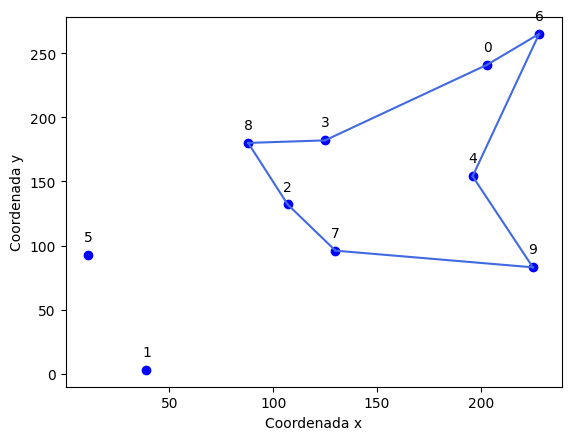

In [11]:
from funcoes_fera_11 import plota_multiplos_trajetos

fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_multiplos_cx(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_multiplos_trajetos(CIDADES, melhor_individuo_observado)

Para conferir o resultado, podemos realizar uma busca exaustiva.


Melhor individuo obtido por busca exaustiva:
[[1], [5], [3, 0, 6, 4, 9, 7, 2, 8]] com distância: 551.95404334393



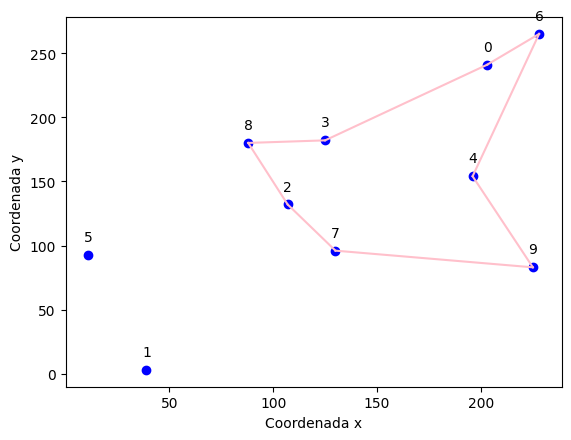

In [12]:
from funcoes_fera_11 import desconverte_de_total
NUM_CIDADES = len(CIDADES)

if True:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho_total in itertools.permutations(range(NUM_CIDADES)):
        for indices in itertools.combinations(range(0, NUM_CIDADES-2), N_CAIXEIROS-1):
            indices = list(indices) + [NUM_CIDADES-1]
            
            caminhos_parcionados = desconverte_de_total(list(caminho_total), indices)
            distancia = funcao_objetivo_multiplos_cx(caminhos_parcionados, CIDADES)
            if distancia < fitness_otimo:
                fitness_otimo = distancia
                resposta_otima = caminhos_parcionados
                melhor_distancia = distancia

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_multiplos_trajetos(CIDADES, resposta_otima)

Verificamos que o algoritmo encontrou, de fato, o resultado ótimo para esse problema.

### Conclusão
<div style=" padding: 10px; text-align: justify">
Assim, resolvemos o problema do caixeiro viajante com múltiplos caixeiros usando um algoritmo genético. Podemos dizer que tivemos êxito em atingimos o resultado, uma vez que encontramos a resposta ótima para minimizar a distância percorrida pelos caixeiros. Com o trabalho feito neste notebook, foi possível desenvolver nossos conhecimentos e práticas em algoritmos genéticos, bem como aplicar uma estratégia para lidar com uma versão mais complexa do problema do caixeiro viajante. </div>

### Referências

[1] Aulas de Redes neurais e Algoritmos Genéticos, ministradas pelo prf. Dr. Daniel R. Cassar.